In [1]:
import pandas as pd


In [2]:
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

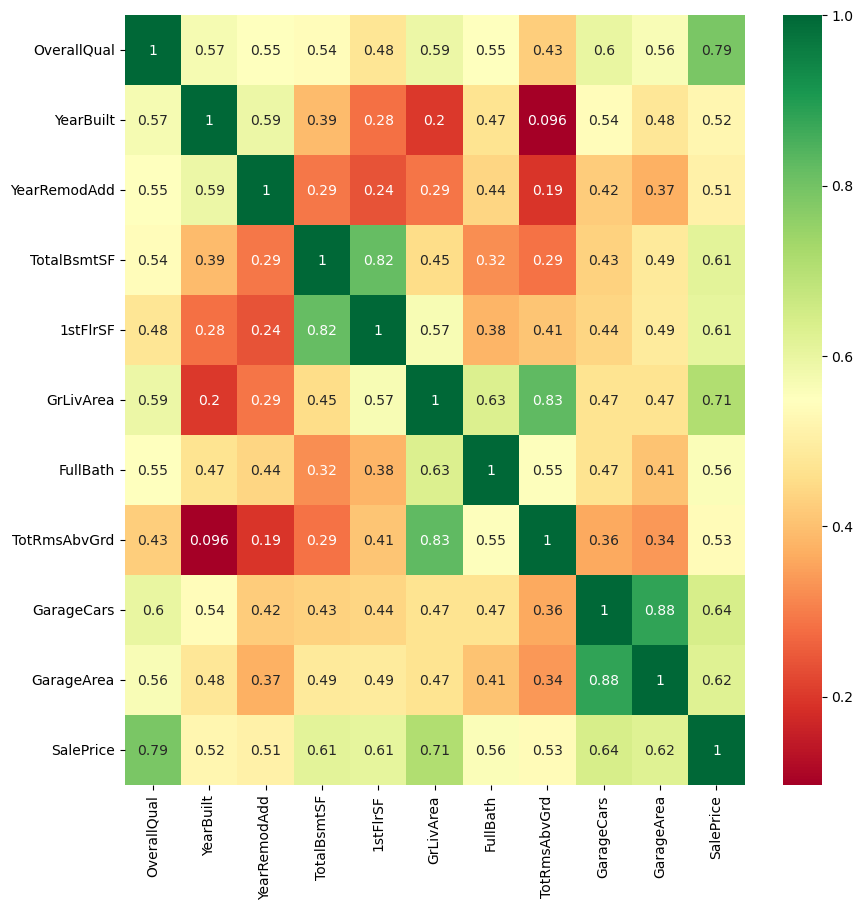

<Axes: >

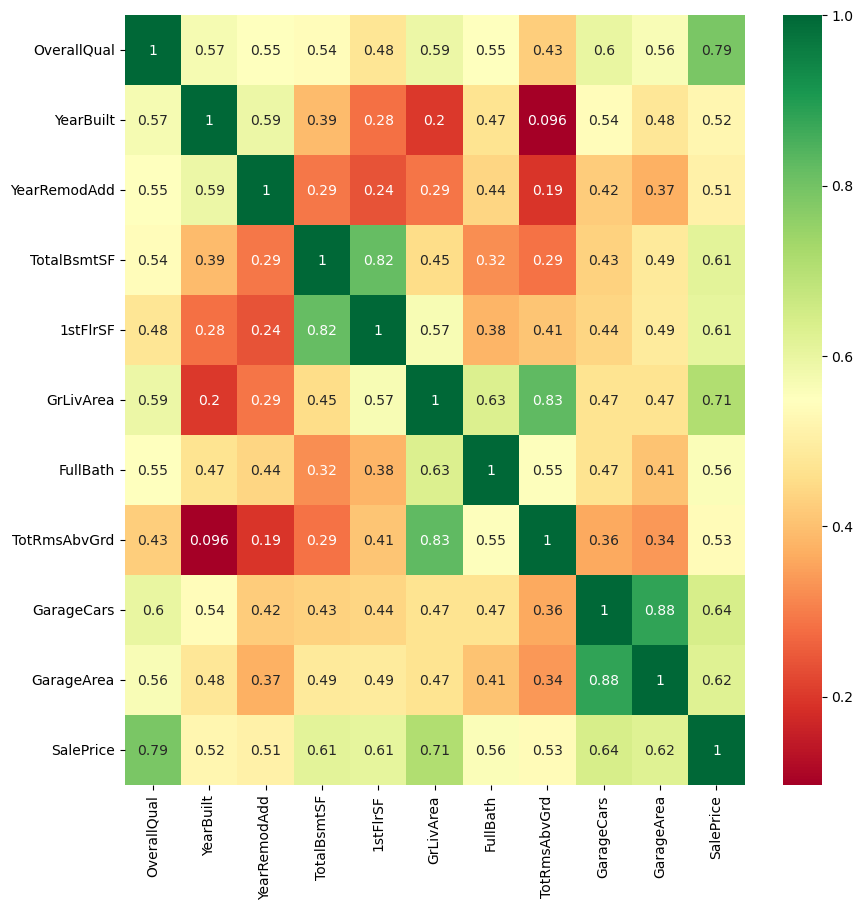

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# En yüksek korelasyona sahip 10 değişkeni görelim
corrmat = train.select_dtypes(include=['int64', 'float64']).corr()

top_corr_features = corrmat.index[abs(corrmat["SalePrice"]) > 0.5]

plt.figure(figsize=(10,10))
sns.heatmap(train[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
sns.heatmap(train[top_corr_features].corr(), annot=True, cmap="RdYlGn")

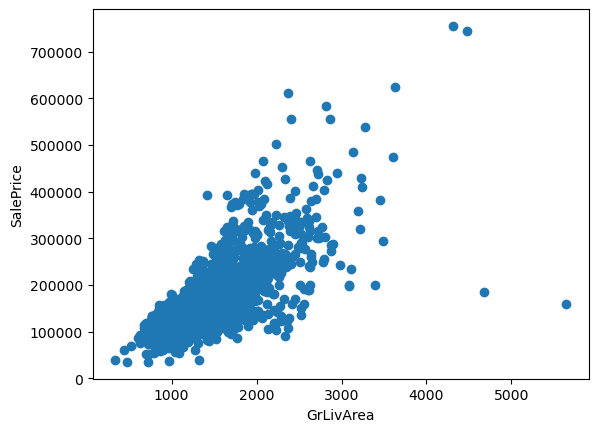

In [4]:
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

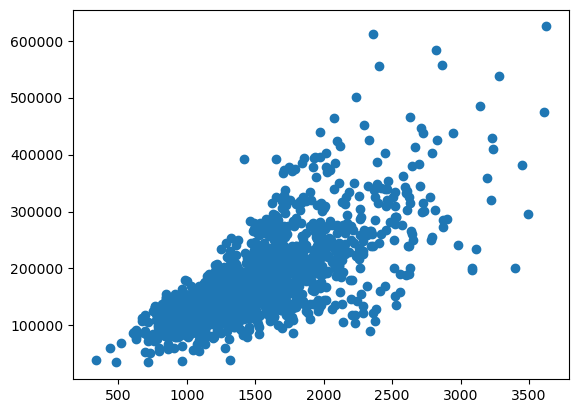

In [5]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<3000000)].index)

plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.show()

In [6]:
cols_to_fix = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
               "GarageType", "GarageFinish", "GarageQual", "GarageCond",
               "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]

for col in cols_to_fix:
    train[col] = train[col].fillna("None")

train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


In [7]:
train.isnull().sum().sort_values(ascending=False).head(10)

MasVnrType     871
GarageYrBlt     81
MasVnrArea       8
Electrical       1
LotArea          0
MSSubClass       0
MSZoning         0
LotFrontage      0
LandContour      0
Utilities        0
dtype: int64

In [8]:

train['MasVnrType'] = train['MasVnrType'].fillna('None')
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)

In [9]:
train.isnull().sum().max()

0

In [10]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond', 'HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(train[c].values))
    train[c] = lbl.transform(list(train[c].values))

print(train.info())

    

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1456 non-null   int64  
 1   MSSubClass     1456 non-null   int64  
 2   MSZoning       1456 non-null   object 
 3   LotFrontage    1456 non-null   float64
 4   LotArea        1456 non-null   int64  
 5   Street         1456 non-null   int64  
 6   Alley          1456 non-null   int64  
 7   LotShape       1456 non-null   int64  
 8   LandContour    1456 non-null   object 
 9   Utilities      1456 non-null   object 
 10  LotConfig      1456 non-null   object 
 11  LandSlope      1456 non-null   int64  
 12  Neighborhood   1456 non-null   object 
 13  Condition1     1456 non-null   object 
 14  Condition2     1456 non-null   object 
 15  BldgType       1456 non-null   object 
 16  HouseStyle     1456 non-null   object 
 17  OverallQual    1456 non-null   int64  
 18  OverallCond  

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = train.drop(['Id', 'SalePrice'], axis=1)
y = train['SalePrice']

X = pd.get_dummies(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np

val_predictions = rf_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
print(f"Average Margin of Error of the Model (RMSE): {rmse}")

Average Margin of Error of the Model (RMSE): 24499.68940092766


In [13]:
test = pd.read_csv('test.csv')
test_ids = test['Id']

X_test_final = test.drop(['Id'], axis=1)
X_test_final = pd.get_dummies(X_test_final)

X_test_final = X_test_final.reindex(columns = X.columns, fill_value=0)

final_predictions = rf_model.predict(X_test_final)

submission = pd.DataFrame({'Id': test_ids, 'SalePrice': final_predictions})
submission.to_csv('Final_Submission.csv', index=False)

In [14]:
print(submission)

        Id  SalePrice
0     1461  124207.50
1     1462  153971.27
2     1463  188363.52
3     1464  187786.52
4     1465  226519.63
...    ...        ...
1454  2915   80982.11
1455  2916   83239.72
1456  2917  159731.24
1457  2918  115872.00
1458  2919  229120.37

[1459 rows x 2 columns]


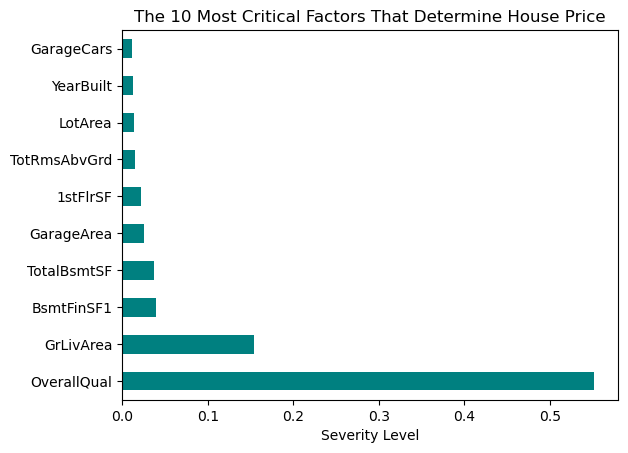

In [15]:
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh', color='teal')
plt.title('The 10 Most Critical Factors That Determine House Price')
plt.xlabel('Severity Level')
plt.show()

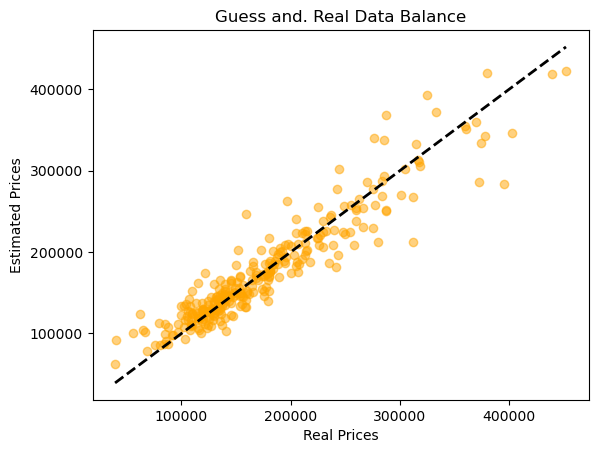

In [28]:
plt.scatter(y_val, val_predictions, alpha=0.5, color='orange')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Real Prices')
plt.ylabel('Estimated Prices')
plt.title('Guess and. Real Data Balance')
plt.show()